### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Create Sequence 

In [52]:
def create_sequence(directory, number, sequence, col_num, num_set):
    '''Creates Sequence for Regression using Deep NN.
       Pass: Directory name, Cut Number, Sequence in Power of 2, Column to be exracted, Total Number Set.
       Return: 3-D Array to pass into the Neural Networks'''
    array = [] # Empty List
    for i in range(1, 316): # There are 315 files
        if i%10 == i:  # If i <= 9 i.e. i is a single digit number
            f = f'00{i}'
        elif i//10>=1 and i//10<=9: # If  i >=10 and i<=99 i.e. i is a double digit number.
            f = f'0{i}'
        else: # If  i >=100 and i<=999 i.e. i is a triple digit number.
            f = f'{i}'
        df = pd.read_csv(directory + f'c_{number}_{f}.csv', header=None) # Read CSV
        df = (df-df.mean())/df.std()
        li_set = []
        for j in range(0,num_set):
            li=[]
            for k in range(0,col_num):
                x = df[k][j*sequence:(j+1)*sequence]
                li.extend(x)
            li_set.append(li)
        array.append(li_set)
    array = np.asarray(array)
      
    return array # Return

#### Sequence from C1 Cut

In [53]:
cut_1 = create_sequence(directory='C:/Users/MNTM/Desktop/Tool Wear/C1/', number='1', sequence=512, col_num=6, num_set=100) # Call

#### Sequence from C4 Cut

In [54]:
cut_2 = create_sequence(directory='C:/Users/MNTM/Desktop/Tool Wear/C4/', number='4', sequence=512, col_num=6, num_set=100) # Call

#### Sequence from C6 Cut

In [55]:
cut_3 = create_sequence(directory='C:/Users/MNTM/Desktop/Tool Wear/C6/', number='6', sequence=512, col_num=6, num_set=100) # Call

In [56]:
print('Shape of cut 1:', cut_1.shape) # Print Shape of cut_1
print('Shape of cut 2:', cut_2.shape) # Print Shape of cut_1
print('Shape of cut 3:', cut_3.shape) # Print Shape of cut_1

Shape of cut 1: (315, 100, 3072)
Shape of cut 2: (315, 100, 3072)
Shape of cut 3: (315, 100, 3072)


#### CUT 1 Wear

In [57]:
wear_c1 = pd.read_csv('C:/Users/MNTM/Desktop/Tool Wear/C1/c1_wear.csv') # Read CSV
wear_c1 = wear_c1.drop(labels=['cut'], axis = 1) # Drop the Cut Column
wear_c1['Max. Wear'] = wear_c1.max(axis = 1) # Find the Maximum of the three flutes wear in microns.
cut_1_wear = np.array(wear_c1['Max. Wear']) # Get the Maximum Wear as Array
wear_c1.head() # Read dataframes

,flute_1,flute_2,flute_3,Max. Wear
0,32.317114,48.892617,37.720825,48.892617
1,37.914879,49.570815,37.720825,49.570815
2,43.087910,50.302867,37.720825,50.302867
3,47.859072,51.083652,37.849851,51.083652
4,52.250329,51.908288,38.172665,52.250329


#### CUT 4 Wear

In [58]:
wear_c4 = pd.read_csv('C:/Users/MNTM/Desktop/Tool Wear/C4/c4_wear.csv') # Read CSV
wear_c4 = wear_c4.drop(labels=['cut'], axis = 1) # Drop the Cut Column
wear_c4['Max. Wear'] = wear_c4.max(axis = 1) # Find the Maximum of the three flutes wear in microns.
cut_4_wear = np.array(wear_c4['Max. Wear']) # Get the Maximum Wear as Array
wear_c4.head() # Read dataframes

,flute_1,flute_2,flute_3,Max. Wear
0,31.416355,19.483692,21.748063,31.416355
1,34.892770,23.473047,24.925960,34.892770
2,38.102847,27.172868,27.898659,38.102847
3,41.061023,30.599309,30.677848,41.061023
4,43.781191,33.767870,33.274721,43.781191


#### CUT 6 Wear

In [59]:
wear_c6 = pd.read_csv('C:/Users/MNTM/Desktop/Tool Wear/C6/c6_wear.csv') # Read CSV
wear_c6 = wear_c6.drop(labels=['cut'], axis = 1) # Drop the Cut Column
wear_c6['Max. Wear'] = wear_c6.max(axis = 1) # Find the Maximum of the three flutes wear in microns.
cut_6_wear = np.array(wear_c6['Max. Wear']) # Get the Maximum Wear as Array
wear_c6.head() # Read dataframes

,flute_1,flute_2,flute_3,Max. Wear
0,62.788648,9.896641,14.620908,62.788648
1,64.136043,19.793281,29.241817,64.136043
2,65.365273,29.689922,43.862725,65.365273
3,66.486880,39.586563,58.483634,66.486880
4,67.510808,43.019994,59.345759,67.510808


In [60]:
print('Wear 1 Shape:', cut_1_wear.shape) # Print Shapes
print('Wear 4 Shape:', cut_4_wear.shape) # Print Shapes
print('Wear 6 Shape:', cut_6_wear.shape) # Print Shapes

Wear 1 Shape: (315,)
Wear 4 Shape: (315,)
Wear 6 Shape: (315,)


### Train-Test Set

#### Train-Test with C1-C4 and C6

In [61]:
trainX_1 = np.concatenate((cut_1, cut_2), axis=0) # Concatenate Train Features
testX_1 = cut_3 # Test Set Features
trainY_1 = np.concatenate((cut_1_wear, cut_4_wear), axis=0) # COncatenate Train Labels
testY_1 = cut_6_wear # Test Set Labels

#### Train-Test with C1-C6 and C4

In [62]:
trainX_2 = np.concatenate((cut_1, cut_3), axis=0) # Concatenate Train Features
testX_2 = cut_2 # Test Set Features
trainY_2 = np.concatenate((cut_1_wear, cut_6_wear), axis=0) # COncatenate Train Labels
testY_2 = cut_4_wear # Test Set Labels

#### Train-Test with C4-C6 and C1

In [63]:
trainX_3 = np.concatenate((cut_2, cut_3), axis=0) # Concatenate Train Features
testX_3 = cut_1 # Test Set Features 
trainY_3 = np.concatenate((cut_4_wear, cut_6_wear), axis=0) # COncatenate Train Labels
testY_3 = cut_1_wear # Test Set Labels

### CNN-GRU Model

In [64]:
def convolution_layer_1(inputs, kernel_size, layer):
    '''Makes the Convolution Layer.
       Pass: Inputs, Kernel Size as tuple, Layer Number.
       Return: Final output'''
    conv_1 = tf.keras.layers.Conv1D(filters=32, kernel_size=kernel_size, padding='same', activation='relu', name=f'Conv1D_{layer}_1')(inputs) # Convolution Layer 1D
    bn_1   = tf.keras.layers.BatchNormalization(name=f'BN_{layer}_1')(conv_1)   # Batch Normalisation
    conv_2 = tf.keras.layers.Conv1D(filters=32, kernel_size=kernel_size, padding='same', activation='relu', name=f'Conv1D_{layer}_2')(bn_1)   # Convolution Layer 1D
    bn_2   = tf.keras.layers.BatchNormalization(name=f'BN_{layer}_2')(conv_2)   # Batch Normalisation
    pool_1 = tf.keras.layers.MaxPool1D(pool_size=2, padding='same', strides=1, name=f'Pool_{layer}')(bn_2) # Max Pooling
    
    return pool_1 # Return

In [65]:
def convolution_layer_2(inputs, kernel_size, layer):
    '''Makes the Convolution Layer.
       Pass: Inputs, Kernel Size as tuple, Layer Number.
       Return: Final output'''
    pool_1 = tf.keras.layers.MaxPool1D(pool_size=2, padding='same', strides=1, name=f'Pool_{layer}')(inputs) # Max Pooling
    conv_1 = tf.keras.layers.Conv1D(filters=32, kernel_size=kernel_size, padding='same', activation='relu', name=f'Conv1D_{layer}_1')(pool_1) # Convolution Layer 1D
    bn_1   = tf.keras.layers.BatchNormalization(name=f'BN_{layer}_1')(conv_1)   # Batch Normalisation
    conv_2 = tf.keras.layers.Conv1D(filters=32, kernel_size=kernel_size, padding='same', activation='relu', name=f'Conv1D_{layer}_2')(bn_1)   # Convolution Layer 1D
    bn_2   = tf.keras.layers.BatchNormalization(name=f'BN_{layer}_2')(conv_2)   # Batch Normalisation
    
    return bn_2 # Return

In [67]:
INPUT_LAYER = tf.keras.layers.Input(shape=(trainX_1.shape[1], trainX_1.shape[2]), name='input_layer') # Input
CONV_1 = convolution_layer_1(INPUT_LAYER, kernel_size=(1), layer='1') # Convolution Layer 1
CONV_2 = convolution_layer_1(INPUT_LAYER, kernel_size=(3), layer='2') # Convolution Layer 2
CONV_3 = convolution_layer_1(INPUT_LAYER, kernel_size=(5), layer='3') # Convolution Layer 3
CONV_4 = convolution_layer_1(INPUT_LAYER, kernel_size=(7), layer='4') # Convolution Layer 4
CONV_5 = convolution_layer_1(INPUT_LAYER, kernel_size=(9), layer='5') # Convolution Layer 5
CONV_6 = convolution_layer_2(INPUT_LAYER, kernel_size=(11), layer='6')# Convolution Layer 6
CONCATENATE = tf.keras.layers.concatenate([CONV_1, CONV_2, CONV_6], name='Concatenate') # Concatenate Layer
GRU_1 = tf.keras.layers.GRU(units=180, return_sequences=True, return_state=True, activation='relu', name='GRU_1')(CONCATENATE) # GRU Unit
GRU_2 = tf.keras.layers.GRU(units=180, activation='relu', name='GRU_2')(GRU_1) # GRU Unit
DROP = tf.keras.layers.Dropout(0.2, name='Drop_GRU')(GRU_2) # Dropout
FLAT = tf.keras.layers.Flatten(name='Flatten')(DROP) # Flatten
DENSE_1 = tf.keras.layers.Dense(units=120, activation='relu', name='FCN_1')(FLAT) # Fully Connected Layer
DROPOUT = tf.keras.layers.Dropout(0.2, name='Dropout')(DENSE_1) # Dropout
DENSE_2 = tf.keras.layers.Dense(units=32, activation='relu', name='FCN_2')(DROPOUT) # Fully Connected Layer
WEAR = tf.keras.layers.Dense(units=1, name='Flank_Wear')(DENSE_2)

In [68]:
model = tf.keras.Model(inputs=INPUT_LAYER, outputs=WEAR, name='Tool_Wear_Predictor')

In [69]:
model.summary()

Model: "Tool_Wear_Predictor"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 100, 3072)]  0                                            
__________________________________________________________________________________________________
Conv1D_1_1 (Conv1D)             (None, 100, 32)      98336       input_layer[0][0]                
__________________________________________________________________________________________________
Conv1D_2_1 (Conv1D)             (None, 100, 32)      294944      input_layer[0][0]                
__________________________________________________________________________________________________
Pool_6 (MaxPooling1D)           (None, 100, 3072)    0           input_layer[0][0]                
________________________________________________________________________________

#### Model Compile Parameters

In [70]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) # Optimizer
loss = tf.keras.losses.MeanAbsoluteError() # Custom Loss

#### Compile

In [71]:
model.compile(optimizer=optimizer, loss=loss) # Compile

#### Callbacks

In [72]:
csv_logger = tf.keras.callbacks.CSVLogger('Tool_Wear_Predictor.csv')

#### Fit Model

In [73]:
epochs=20

In [80]:
history = model.fit(trainX_1, trainY_1, epochs=epochs, verbose=1, callbacks=[csv_logger], shuffle=True) # Fit Model

Epoch 1/20
20/20 [==============================] - 34s 676ms/step - loss: 20.8946
Epoch 2/20
20/20 [==============================] - 11s 565ms/step - loss: 21.4256
Epoch 3/20
20/20 [==============================] - 11s 558ms/step - loss: 19.8680
Epoch 4/20
20/20 [==============================] - 11s 560ms/step - loss: 15.8146
Epoch 5/20
20/20 [==============================] - 11s 550ms/step - loss: 17.6214
Epoch 6/20
20/20 [==============================] - 11s 555ms/step - loss: 19.1588
Epoch 7/20
20/20 [==============================] - 11s 557ms/step - loss: 16.7412
Epoch 8/20
20/20 [==============================] - 11s 555ms/step - loss: 15.5546
Epoch 9/20
20/20 [==============================] - 11s 560ms/step - loss: 15.8563
Epoch 10/20
20/20 [==============================] - 11s 566ms/step - loss: 15.9649
Epoch 11/20
20/20 [==============================] - 11s 549ms/step - loss: 14.3461
Epoch 12/20
20/20 [==============================] - 11s 547ms/step - loss: 14.9794
E

In [81]:
df = pd.read_csv('Tool_Wear_Predictor.csv')
df.head()

,epoch,loss
0,0,20.894617
1,1,21.425558
2,2,19.868044
3,3,15.814641
4,4,17.621428


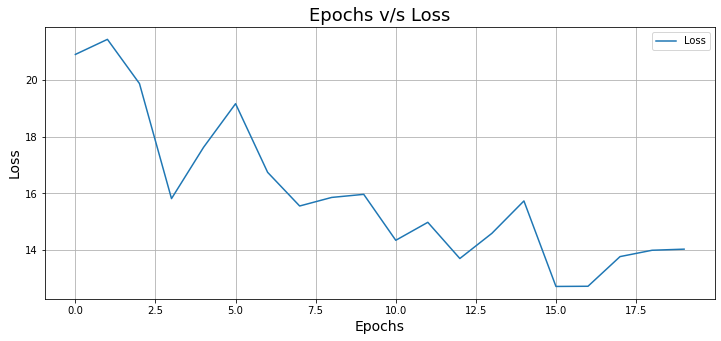

In [82]:
def plot(history, string):
    plt.figure(figsize = (12,5))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
    plt.plot(history[string], label = string.capitalize())
#     plt.plot(history['val_'+string], label = 'val_'+string)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Epochs', fontdict={'fontsize':14})
    plt.ylabel(string.capitalize(), fontdict={'fontsize':14})
    plt.title(f'Epochs v/s {string.capitalize()}', fontdict={'fontsize':18})
    plt.show()

# Call
plot(df, 'loss')

#### Evaluate

In [83]:
evaluate = model.evaluate(testX_1, testY_1, verbose=1) # Evaluate

10/10 [==============================] - 2s 185ms/step - loss: 34.3313


#### Predition

In [86]:
y_pred = model.predict(testX_2, verbose=1) # Evaluate

10/10 [==============================] - 2s 185ms/step


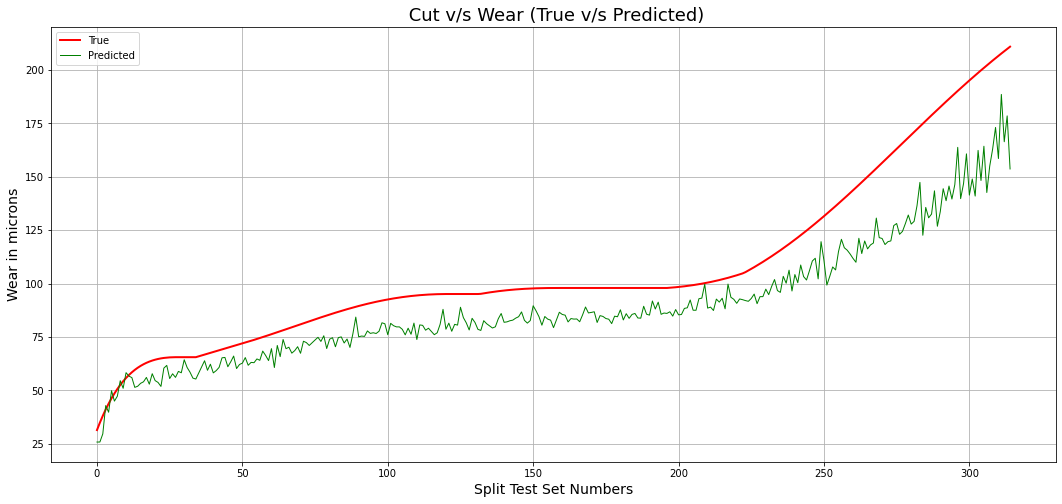

In [88]:
# Plot True RUL v/s Predicted RUL
def plot_prediction():
    plt.figure(figsize = (18, 8))
    plt.plot(testY_2, 'red', label = 'True', linewidth=2)
    plt.plot(y_pred, 'green', label = 'Predicted', linestyle='-', linewidth=1)
    plt.xlabel('Split Test Set Numbers', fontdict={'fontsize':14})
    plt.ylabel('Wear in microns', fontdict={'fontsize':14})
    plt.title(' Cut v/s Wear (True v/s Predicted)', fontdict={'fontsize':18})
    plt.legend()
    plt.grid(True)
    plt.show()
    return None

# Call
plot_prediction()